# Objective:-A cloth manufacturing company is interested to know about the segment or attributes causes high sale.  

In [1]:
##Importing important libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv("D:\\Data sets\\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
df["sales"]=(df["Sales"]>7.49)*1

In [6]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [7]:
label_encoder=preprocessing.LabelEncoder()
df["ShelveLoc"]=label_encoder.fit_transform(df["ShelveLoc"])
df["Urban"]=label_encoder.fit_transform(df["Urban"])
df["US"]=label_encoder.fit_transform(df["US"])

In [8]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,0


In [9]:
x=df.iloc[:,1:9] ##11

In [10]:
y=df.iloc[:,-1].values

In [11]:
from sklearn.model_selection import KFold

In [51]:
kfold=KFold(n_splits=10,random_state=42)

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [13]:
kfold

KFold(n_splits=10, random_state=42, shuffle=False)

In [41]:
model = RandomForestClassifier(n_estimators=110)

In [42]:
result=cross_val_score(model,x,y,cv=kfold)
print(result.mean())

0.8175000000000001


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [45]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=110)

In [46]:
from sklearn import metrics

In [47]:
Y_pred=model.predict(x_train)

In [48]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

accuracy: 1.0


In [49]:
model.score(x_train, y_train)

1.0

In [23]:
y_pred=model.predict(x_test)

In [24]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7416666666666667


In [25]:
model.score(x_test, y_test)

0.7416666666666667

In [26]:
model.predict([[110,100,4,466,97,2,55,14,]])

array([1])

In [27]:
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp

Price          0.280112
Age            0.143045
ShelveLoc      0.131577
CompPrice      0.122952
Advertising    0.107835
Income         0.103193
Population     0.062495
Education      0.048793
dtype: float64

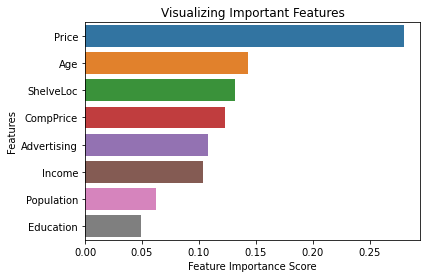

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [37]:
train_accuracy = []
test_accuracy = []
for max_features in range(1,8):
    model=RandomForestClassifier(n_estimators=110, max_features=max_features)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [39]:
data = pd.DataFrame({'max_features':range(1,8),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_features,train_acc,test_acc
0,1,1.0,0.733333
1,2,1.0,0.750000
2,3,1.0,0.750000
3,4,1.0,0.741667
4,5,1.0,0.758333
5,6,1.0,0.758333
6,7,1.0,0.741667


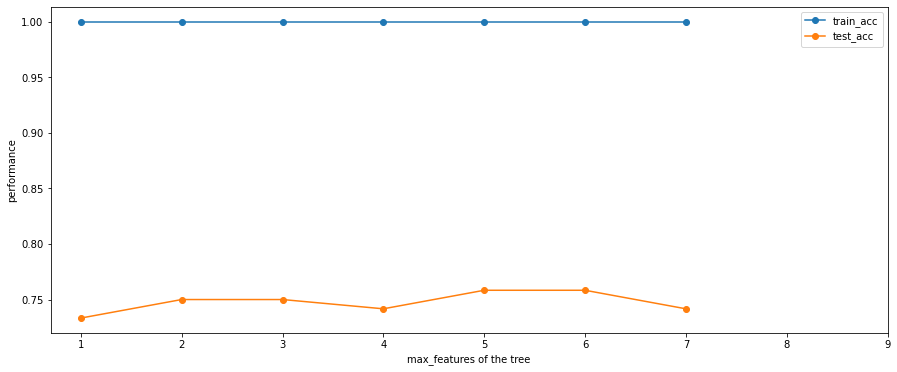

In [40]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_features'],data['train_acc'], marker = 'o')
plt.plot(data['max_features'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,10))
plt.legend(labels)
plt.xlabel('max_features of the tree')
plt.ylabel('performance')
plt.show()